In [1]:
import pickle
import os
import time
import numpy as np
import ast


import cooltools
import cooltools.lib.plotting
#import functions

import shutil

import pandas as pd
import warnings
import h5py 
import glob

#from scorefunctions import *
import matplotlib.pyplot as plt
import sys

/home1/rahmanin/.conda/envs/openmm-env/lib/python3.7/site-packages/cooltools/lib/numutils.py:11: FutureWarning: The `cooler.tools` module is deprecated in v0.9 and will be removed in v0.10. Use `cooler.parallel` instead.
  from ._numutils import (
/home1/rahmanin/.conda/envs/openmm-env/lib/python3.7/site-packages/cooltools/api/expected.py:14: FutureWarning: The `cooler.tools` module is deprecated in v0.9 and will be removed in v0.10. Use `cooler.parallel` instead.
  from cooler.tools import partition


In [3]:
path_dict = {}

directory='/scratch1/rahmanin/dynamical_boundary_simulations/1_d_sims/dynamic/cluster/sims/'

for fname  in glob.glob(directory+'folder*'):
    path_dict[fname.split('/sims/')[1][:]]= fname
path_dict = dict(sorted(path_dict.items()))

In [24]:
ctcfrightlist = [314, 579, 1195, 3717, 3772, 3921, 4451, 5193, 5723, 6302, 6574, 6779, 7000, 9232, 9310, 9861]
ctcfleftlist = [495, 865, 1404, 2164, 3143, 3615, 3971, 4069, 4480, 4938, 5300, 5587, 6401, 7725, 8764, 9619]
lst = np.array(ctcfrightlist + ctcfleftlist)

In [54]:
### list of boundary elements on all replications

rep = 10 
mon = 1000
site = 10
lst_t = []
for i in range(rep):
    lst_t += list(np.array(lst)+i*mon*site)
#print(lst_t)

In [7]:
def peak_positions(boundary_lst_t, window_sizes=[1]):
    peak_monomers = np.array([])
    for i in window_sizes:
        inds_to_add=[boundary_lst_t[j]+i for j in range(len(boundary_lst_t))]
        peak_monomers = np.hstack((peak_monomers,inds_to_add))
    return peak_monomers.astype(int)

def FRiP(num_sites_t, lef_positions, peak_positions ):
    
    hist,edges = np.histogram(  lef_positions  , np.arange(num_sites_t+1) )
    return np.sum(hist[peak_positions] )/len(lef_positions)

In [8]:
def peak_positions(boundary_list, window_sizes=[1]):
    """
    Calculate peak positions based on a boundary_list within window_sizes.

    Args:
        boundary_list (list): List of boundary values.
        window_sizes (list, optional): List of window sizes. Defaults to [1].

    Returns:
        np.ndarray: Array containing peak positions.
    """
    peak_monomers = np.array([])

    for i in window_sizes:
        inds_to_add = [boundary + i for boundary in boundary_list]
        peak_monomers = np.hstack((peak_monomers, inds_to_add))

    return peak_monomers.astype(int)

In [51]:
dictionary = {'folder_face_1.0_back_0_Clife_500.0_Cof_500.0_Cnum_1_life_500.0_slife_500.0_birth_0.1_pause_0.9_sep_100_site_10_monomer_1000_replica_10_steps_20.0_vel_1',
              'folder_face_1.0_back_0_Clife_500.0_Cof_500.0_Cnum_5_life_500.0_slife_500.0_birth_0.1_pause_0.9_sep_100_site_10_monomer_1000_replica_10_steps_20.0_vel_1',
              'folder_face_1.0_back_0_Clife_500.0_Cof_500.0_Cnum_10_life_500.0_slife_500.0_birth_0.1_pause_0.9_sep_100_site_10_monomer_1000_replica_10_steps_20.0_vel_1'}



folder_face_1.0_back_0_Clife_500.0_Cof_500.0_Cnum_1_life_500.0_slife_500.0_birth_0.1_pause_0.9_sep_100_site_10_monomer_1000_replica_10_steps_20.0_vel_1
10000
1000000
0.16816493


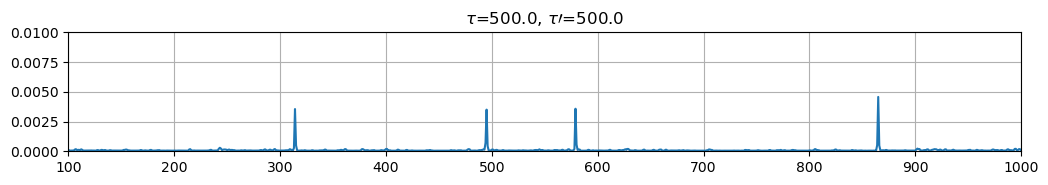

folder_face_1.0_back_0_Clife_500.0_Cof_500.0_Cnum_5_life_500.0_slife_500.0_birth_0.1_pause_0.9_sep_100_site_10_monomer_1000_replica_10_steps_20.0_vel_1
10000
1000000
0.38693793


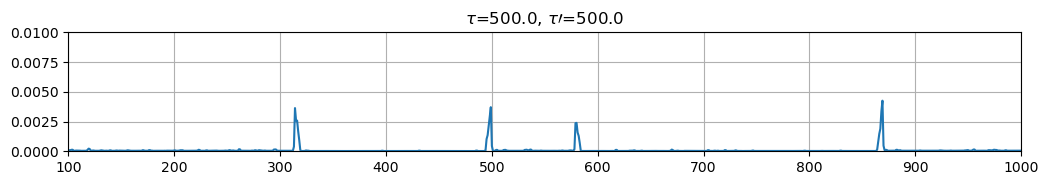

folder_face_1.0_back_0_Clife_500.0_Cof_500.0_Cnum_10_life_500.0_slife_500.0_birth_0.1_pause_0.9_sep_100_site_10_monomer_1000_replica_10_steps_20.0_vel_1
10000
1000000
0.45203518


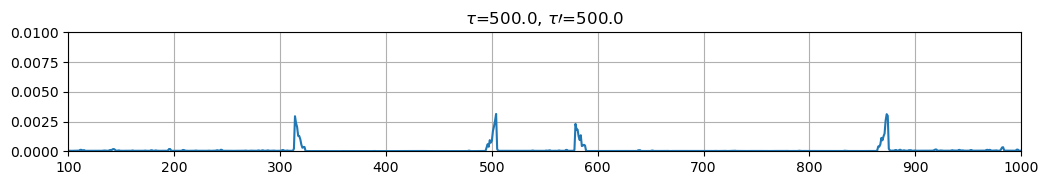

In [53]:
window_size = 1
numx,numy = 1,len(path_dict)
min_time = -500000
c=0
#plt.figure(figsize=(10.5,1.95*len(path_dict)))
hist_dict = {}
#lst = np.arange(0,10001,500)
for name in dictionary:
    print(name)
    #print(path_dict[name])
    params=[ast.literal_eval(i) for i in name.split('folder_')[1].split('_')[1::2]]
    face, back, clife, cof, cnum, life, slife, birth, pause, sep, site, mon, rep, step, vel = params

    c+=1
    #plt.subplot(numy,numx, c)

    mapN=mon*site
    print(mapN)
    #print(path_dict[name]+'/LEFPositions.h5')
    lefs = h5py.File(path_dict[name]+'/LEFPositions.h5','r')["positions"]
    print(len(lefs))
    
    
    lef_lefts = lefs[min_time:,:,0].flatten()
    lef_rights = lefs[min_time:,:,1].flatten()
    lef_positions = np.hstack((lef_lefts,lef_rights))

    peak_monomers = peak_positions(lst_t,window_sizes=np.arange(-window_size,(window_size)+1+cnum) )
    #print(peak_monomers)
    frip = FRiP(mapN * rep, lef_positions, peak_monomers)
    print(frip)


    plt.figure(figsize = (10.5,1.95))
    a,b = np.histogram(  np.mod( np.hstack((lef_lefts,lef_rights)) , mapN ), np.arange(0,mapN,1))
    #print(b)
    plt.plot(a/np.sum(a), label=name)
    plt.scatter(ctcfrightlist,np.zeros(len(ctcfrightlist)),marker='>',color='red',s=50,zorder=3)
    plt.scatter(ctcfleftlist,np.zeros(len(ctcfleftlist)),marker='<',color='red',zorder=3)
    plt.ylim([0,.01])
    plt.grid(True)
    plt.xlim(100, 1000)
    hist_dict[name] = a/np.sum(a)
    plt.title(r'$\tau$=%s, $\tau\prime$=%s'%(clife,cof))
    #a,b = np.histogram(  np.mod(lefs[-100:,:,0].flatten(),300 ), np.arange(301))
    #plt.plot(a)
    plt.savefig('chipseq_for_%s.png'%clife)
    
    plt.tight_layout()
    plt.show()


In [29]:
window_size = 1

file = open('fripscore_for_cluster.csv', 'w')
file.write('lifetime, velocity, separation, clife, cof, cnum, fripscore\n')
i = 1
for name in list(path_dict.keys())[:]:
    params=[ast.literal_eval(i) for i in name.split('folder_')[1].split('_')[1::2]]
    face, back, clife, cof, cnum, life, slife, birth, pause, sep, site, mon, rep, step, vel = params
    
    print(i)
    i += 1
    mapN=mon*site
    #print(np.round(cof,4))
    lefs = h5py.File(path_dict[name]+'/LEFPositions.h5','r')["positions"]

    lef_lefts = lefs[min_time:,:,0].flatten()
    lef_rights = lefs[min_time:,:,1].flatten()
    lef_positions = np.hstack((lef_lefts,lef_rights))


    peak_monomers = peak_positions(lst_t,window_sizes=np.arange(-window_size,(window_size)+cnum) )
    frip = FRiP(mapN * rep, lef_positions, peak_monomers)

    score = FRiP(mapN * rep, lef_positions, peak_monomers)
    print(score)
    file.write('%s,%s,%s,%s,%s,%s,%s\n'%(life, vel, sep, clife, cof, cnum, score))
file.close()

1
0.46943842
2
0.4701518
3
0.21921264
4
0.32301121
5
0.37561215
6
0.41657977
7
0.42665738
8
0.44301143
9
0.44308931
10
0.45570386
11
0.46290705
12
0.46657684
13
0.46570784
14
0.37949611
15
0.43174607
16
0.45267868
17
0.45153838
18
0.45234503
19
0.45063211
20
0.46099471
21
0.46182933
22
0.47155077
23
0.46872403
24
0.47449897
25
0.30347311
26
0.3897492
27
0.42323581
28
0.44458486
29
0.45319464
30
0.45567061
31
0.46220792
32
0.46388087
33
0.46575359
34
0.04583094
35
0.04964411
36
0.01002209
37
0.01608544
38
0.01750454
39
0.02065874
40
0.02680073
41
0.03127319
42
0.03303036
43
0.03672509
44
0.04133053
45
0.2085038
46
0.21739337
47
0.03271108
48
0.05563834
49
0.07797439
50
0.09477909
51
0.11884368
52
0.13830768
53
0.15586323
54
0.17521632
55
0.18791837
56
0.06344266
57
0.07056905
58
0.01183387
59
0.01727498
60
0.02359425
61
0.02909979
62
0.03470746
63
0.04116236
64
0.04593408
65
0.0533297
66
0.05677673
67
0.39019391
68
0.39933348
69
0.08972574
70
0.15467807
71
0.20887344
72
0.24857184
73
0.

In [30]:
file = pd.read_csv('fripscore_for_cluster.csv')
file

,lifetime,velocity,separation,clife,cof,cnum,fripscore
0,500.0,1,100,1500.0,1500.0,10,0.469438
1,500.0,1,100,1500.0,1500.0,11,0.470152
2,500.0,1,100,1500.0,1500.0,1,0.219213
3,500.0,1,100,1500.0,1500.0,2,0.323011
4,500.0,1,100,1500.0,1500.0,3,0.375612
...,...,...,...,...,...,...,...
94,500.0,1,100,500.0,500.0,5,0.385054
95,500.0,1,100,500.0,500.0,6,0.412397
96,500.0,1,100,500.0,500.0,7,0.431718
97,500.0,1,100,500.0,500.0,8,0.436876


In [42]:
num_plot = 5
viridis_cmap = plt.get_cmap('cividis')

# Generate an array of values from 0 to 1 to map to colors in the colormap
values = np.linspace(0, 1, num_plot)

# Get the corresponding colors from the colormap
colors = viridis_cmap(values)

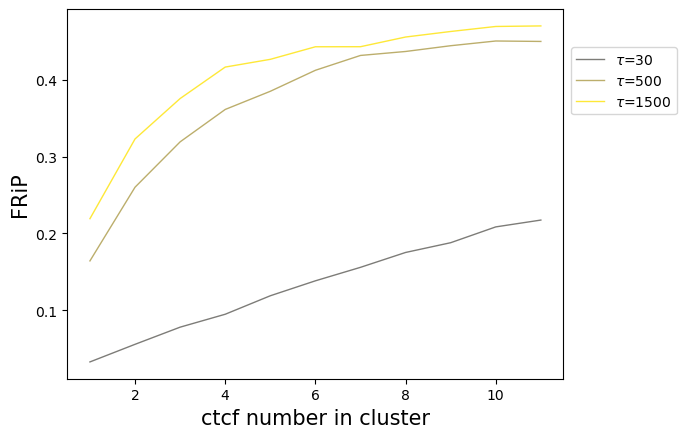

In [48]:
lifes, vels = [500] , [1]


i=1
file = pd.read_csv('fripscore_for_cluster.csv')
file = file[file[' separation']==100]
lifetime = file['lifetime']
velocity = file[' velocity']
clife = file[' clife']
cof = file[' cof']
cnum = file[' cnum']
unique_life = np.unique(lifetime)
unique_vel = np.unique(velocity)
unique_clife = np.unique(clife)
unique_cof = np.unique(cof)
unique_cnum = np.unique(cnum)
cof_val = 10
clife_range = [30, 500, 1500]
for clife_val in clife_range:
    for life in lifes:
        for vel in vels:
            i+=1
            new_file = file[(lifetime == life)&(velocity == vel)&(clife==clife_val)&(cof==clife_val)][[' clife',' cnum', ' fripscore']]
            new_file_filtered = new_file.drop_duplicates(keep = 'first')
            new_file_filtered = new_file_filtered.sort_values(' cnum')
            #print(new_file_filtered)
            new_cnum = new_file_filtered[' cnum']
            frip_score = new_file_filtered[' fripscore']
            plt.plot(new_cnum, frip_score, label = r'$\tau$=%s'%clife_val,linewidth=1, color = colors[i])

plt.legend(fontsize = 10,loc = (1.015,0.715))
plt.ylabel('FRiP',fontsize = 15)
plt.xlabel(r'ctcf number in cluster', fontsize = 15)
plt.savefig('frip_for_occup.png',bbox_inches='tight')
plt.show()

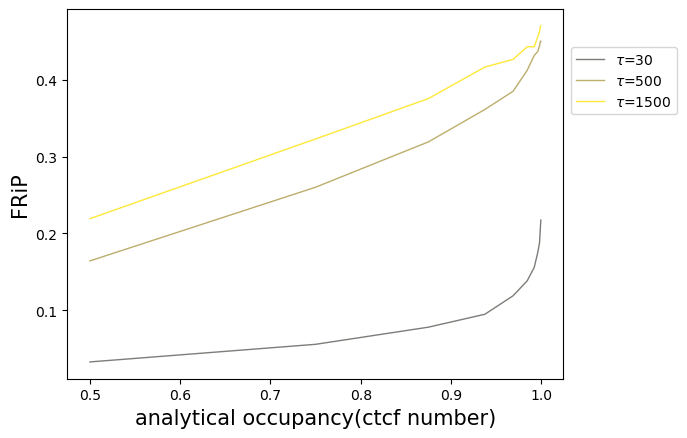

In [50]:
lifes, vels = [500] , [1]


i=1
file = pd.read_csv('fripscore_for_cluster.csv')
file = file[file[' separation']==100]
lifetime = file['lifetime']
velocity = file[' velocity']
clife = file[' clife']
cof = file[' cof']
cnum = file[' cnum']
unique_life = np.unique(lifetime)
unique_vel = np.unique(velocity)
unique_clife = np.unique(clife)
unique_cof = np.unique(cof)
unique_cnum = np.unique(cnum)
cof_val = 10
clife_range = [30, 500, 1500]
for clife_val in clife_range:
    for life in lifes:
        for vel in vels:
            i+=1
            new_file = file[(lifetime == life)&(velocity == vel)&(clife==clife_val)&(cof==clife_val)][[' clife',' cnum', ' fripscore']]
            new_file_filtered = new_file.drop_duplicates(keep = 'first')
            new_file_filtered = new_file_filtered.sort_values(' cnum')
            #print(new_file_filtered)
            new_cnum = new_file_filtered[' cnum']
            frip_score = new_file_filtered[' fripscore']
            plt.plot(1-0.5**new_cnum, frip_score, label = r'$\tau$=%s'%clife_val,linewidth=1, color = colors[i])

plt.legend(fontsize = 10,loc = (1.015,0.715))
plt.ylabel('FRiP',fontsize = 15)
plt.xlabel(r'analytical occupancy(ctcf number)', fontsize = 15)
plt.savefig('frip_for_occup.png',bbox_inches='tight')
plt.show()